# Prepare a model for glass classification using KNN


In [1]:
# KNN Classification
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [2]:
df =pd.read_csv('glass.csv')

In [3]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [5]:
#Count of duplicated rows
df[df.duplicated()].shape

(1, 10)

In [6]:
df[df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [7]:
df1=df.drop_duplicates()

In [8]:
df1 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [9]:
df[df.isnull().any(axis=1)].head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type


In [10]:
df1.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

<AxesSubplot:>

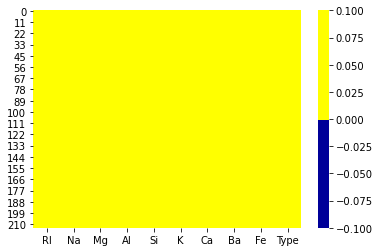

In [11]:
import seaborn as sns
cols = df1.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df1[cols].isnull(),
            cmap=sns.color_palette(colours))

In [12]:
df2=pd.get_dummies(df1)

In [13]:
df2

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [14]:
df3=df2.iloc[0:100:]

In [15]:
df3

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
96,1.51841,13.02,3.62,1.06,72.34,0.64,9.13,0.00,0.15,2
97,1.51743,12.20,3.25,1.16,73.55,0.62,8.90,0.00,0.24,2
98,1.51689,12.67,2.88,1.71,73.21,0.73,8.54,0.00,0.00,2
99,1.51811,12.96,2.96,1.43,72.92,0.60,8.79,0.14,0.00,2


In [16]:


X = array[:, 0:9]
Y = array[:, 9]

In [17]:
array 

array([[ 1.52101, 13.64   ,  4.49   , ...,  0.     ,  0.     ,  1.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  0.     ,  0.     ,  1.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  0.     ,  0.     ,  1.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  1.64   ,  0.     ,  7.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  1.57   ,  0.     ,  7.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  1.67   ,  0.     ,  7.     ]])

In [18]:
num_folds = 10
kfold = KFold(n_splits=10)

In [19]:
model = KNeighborsClassifier(n_neighbors=17)
results = cross_val_score(model, X, Y, cv=kfold)

In [20]:
print(results.mean())

0.43268398268398267


# Grid Search for Algorithm Tuning

In [21]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [24]:

X = array[:, 0:9]
Y = array[:, 9]

In [25]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [26]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [27]:
print(grid.best_score_)
print(grid.best_params_)

0.64828349944629
{'n_neighbors': 1}


# Visualizing the CV results

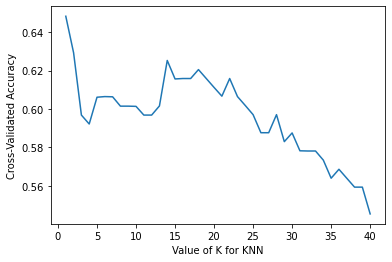

In [28]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# Implement a KNN model to classify the animals in to categorie
data set zoo

In [169]:
# KNN Classification
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [170]:
df =pd.read_csv('Zoo (1).csv')

In [171]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [172]:
X = df.iloc[:, 1:15]
Y = df.iloc[:,16]

In [173]:
array

array([[ 1.52101, 13.64   ,  4.49   , ...,  0.     ,  0.     ,  1.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  0.     ,  0.     ,  1.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  0.     ,  0.     ,  1.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  1.64   ,  0.     ,  7.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  1.57   ,  0.     ,  7.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  1.67   ,  0.     ,  7.     ]])

In [174]:
num_folds = 10
kfold = KFold(n_splits=10)

In [175]:
model = KNeighborsClassifier(n_neighbors=17)
results = cross_val_score(model, X, Y, cv=kfold)

In [176]:
print(results.mean())

0.7309090909090908




# Grid Search for Algorithm Tuning


In [177]:
# Grid Search for Algorithm Tuning
import numpy as np
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [178]:
X = df.iloc[:, 1:15]
Y = df.iloc[:, 16]

In [179]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [180]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [181]:
print(grid.best_score_)
print(grid.best_params_)

0.790952380952381
{'n_neighbors': 7}


# Visualizing the CV results

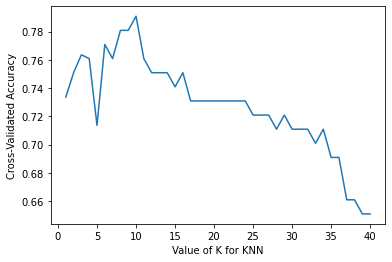

In [182]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()